In [3]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
 # Feature Importance
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
#Load the dataset

AH_data = pd.read_csv("/Users/Rohit/Desktop/nesarc_pds.csv")
data_clean = AH_data.dropna()

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data_clean.dtypes

ETHRACE2A          int64
ETOTLCA2          object
IDNUM              int64
PSU                int64
STRATUM            int64
WEIGHT           float64
CDAY               int64
CMON               int64
CYEAR              int64
REGION             int64
CENDIV             int64
CCS                int64
FIPSTATE           int64
BUILDTYP           int64
NUMPERS            int64
NUMPER18           int64
NUMREL             int64
NUMREL18           int64
CHLD0              int64
CHLD1_4            int64
CHLD5_12           int64
CHLD13_15          int64
CHLD16_17          int64
CHLD0_17           int64
SPOUSE             int64
FATHERIH           int64
MOTHERIH           int64
ADULTCH            int64
OTHREL             int64
NONREL             int64
                  ...   
DEPPDDX2           int64
OBCOMDX2           int64
PARADX2            int64
SCHIZDX2           int64
HISTDX2            int64
ALCABDEP12DX       int64
ALCABDEPP12DX      int64
TAB12MDX           int64
TABP12MDX          int64


In [6]:
data_clean.describe()

,ETHRACE2A,IDNUM,PSU,STRATUM,WEIGHT,CDAY,CMON,CYEAR,REGION,CENDIV,...,SOL12ABDEP,SOLP12ABDEP,HAL12ABDEP,HALP12ABDEP,MAR12ABDEP,MARP12ABDEP,HER12ABDEP,HERP12ABDEP,OTHB12ABDEP,OTHBP12ABDEP
count,43093.000000,43093.000000,43093.000000,43093.000000,43093.000000,43093.000000,43093.000000,43093.000000,43093.000000,43093.000000,...,43093.000000,43093.000000,43093.000000,43093.000000,43093.000000,43093.000000,43093.000000,43093.000000,43093.000000,43093.000000
mean,2.087764,21547.000000,27312.909544,2726.858747,4823.981575,16.146195,8.589632,2001.141578,2.636321,5.142993,...,0.000255,0.003922,0.001532,0.017776,0.018634,0.095027,0.000348,0.004618,0.000093,0.001230
std,1.560799,12440.021912,16019.733641,1595.979984,3485.046966,8.801055,3.051984,0.348620,1.031667,2.511825,...,0.018655,0.079789,0.050501,0.169523,0.186201,0.383204,0.030082,0.106426,0.015233,0.047429
min,1.000000,1.000000,1001.000000,101.000000,398.037382,1.000000,1.000000,2001.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,10774.000000,12044.000000,1209.000000,2240.897957,8.000000,8.000000,2001.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,21547.000000,27018.000000,2701.000000,3723.955061,16.000000,9.000000,2001.000000,3.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,32320.000000,40019.000000,4004.000000,7013.033942,24.000000,10.000000,2001.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,43093.000000,56017.000000,5605.000000,57902.204790,31.000000,12.000000,2002.000000,4.000000,9.000000,...,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [7]:
#Split into training and testing sets

predictors = data_clean[['NUMREL','FATHERIH','MOTHERIH','ADULTCH','OTHREL','NONREL','SEX']]

#Target; Alcohol over
targets = data_clean.S2AQ1

pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors, targets, test_size=.4)

In [8]:
pred_train.shape

(25855, 7)

In [9]:
pred_test.shape

(17238, 7)

In [10]:
tar_train.shape

(25855,)

In [11]:
tar_test.shape

(17238,)

In [12]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=25)
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

In [13]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[13821,   103],
       [ 3246,    68]])

In [14]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.8057199211045365

In [15]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.25971821  0.03109818  0.06717772  0.03659551  0.04031468  0.12215325
  0.44294244]


In [16]:
trees=range(25)
accuracy=np.zeros(25)

In [17]:
for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(pred_train,tar_train)
   predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)

In [18]:
%matplotlib inline

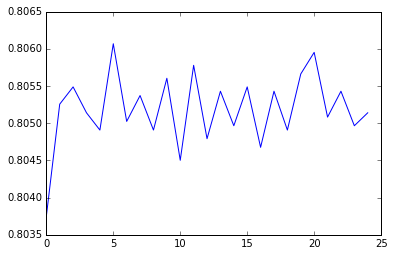

In [19]:
plt.plot(trees, accuracy)